In [1]:
import imageio
from PIL import Image
import skimage.morphology as skm
import skimage

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def view(img):
    if img.dtype != np.uint8:
        img = (img * 255).astype(np.uint8)
    return Image.fromarray(img)

In [3]:
def equalize(img, npoints=11):
    quantiles = np.linspace(0, 1, npoints)
    return np.interp(img, np.quantile(img, quantiles), quantiles)

In [4]:
im1 = imageio.imread('./image/table5.png')
im1.shape

(904, 1277, 3)

In [5]:
im = im1[:, :, 0]
im.shape

(904, 1277)

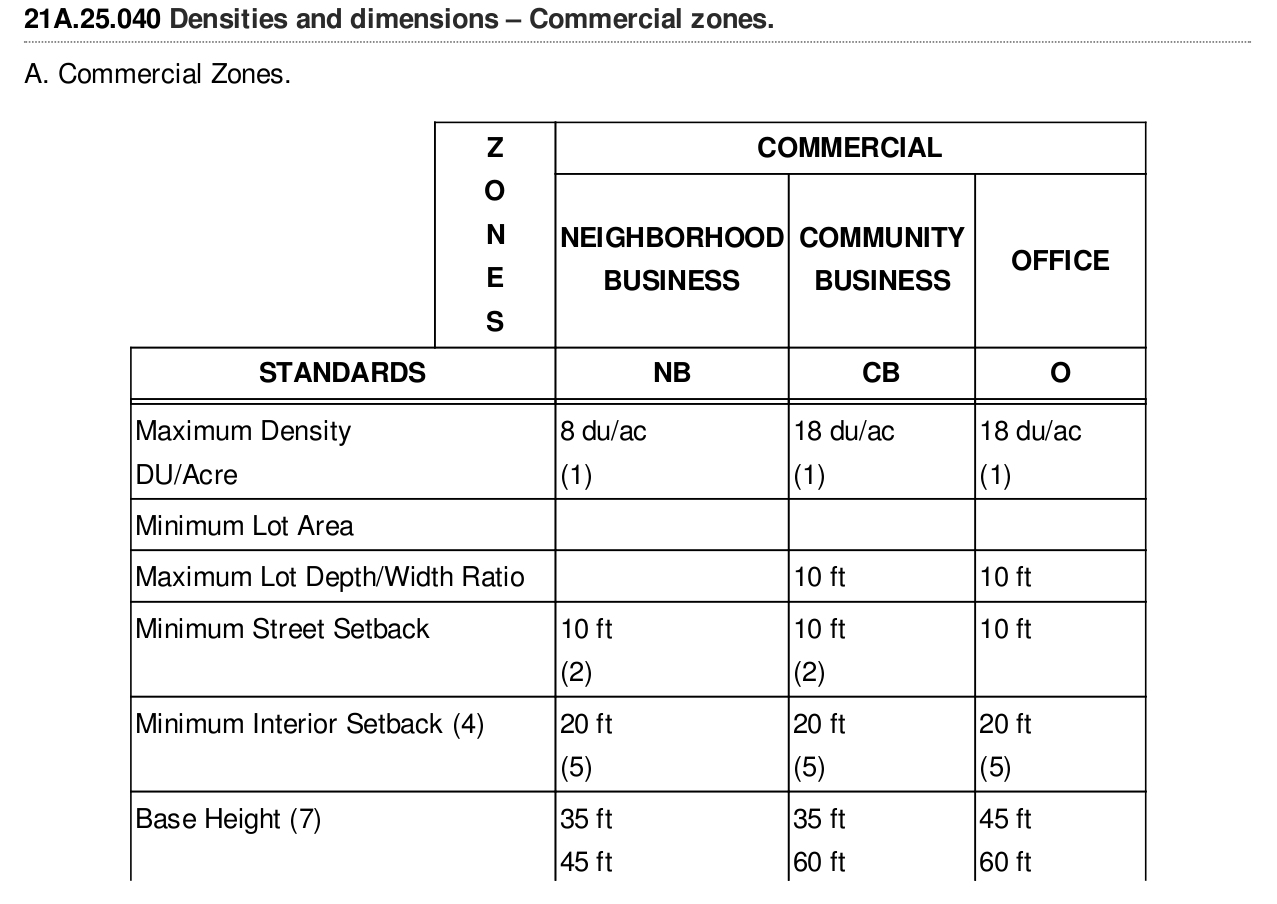

In [6]:
view(im)

In [7]:
skm_disk = skm.disk(1)

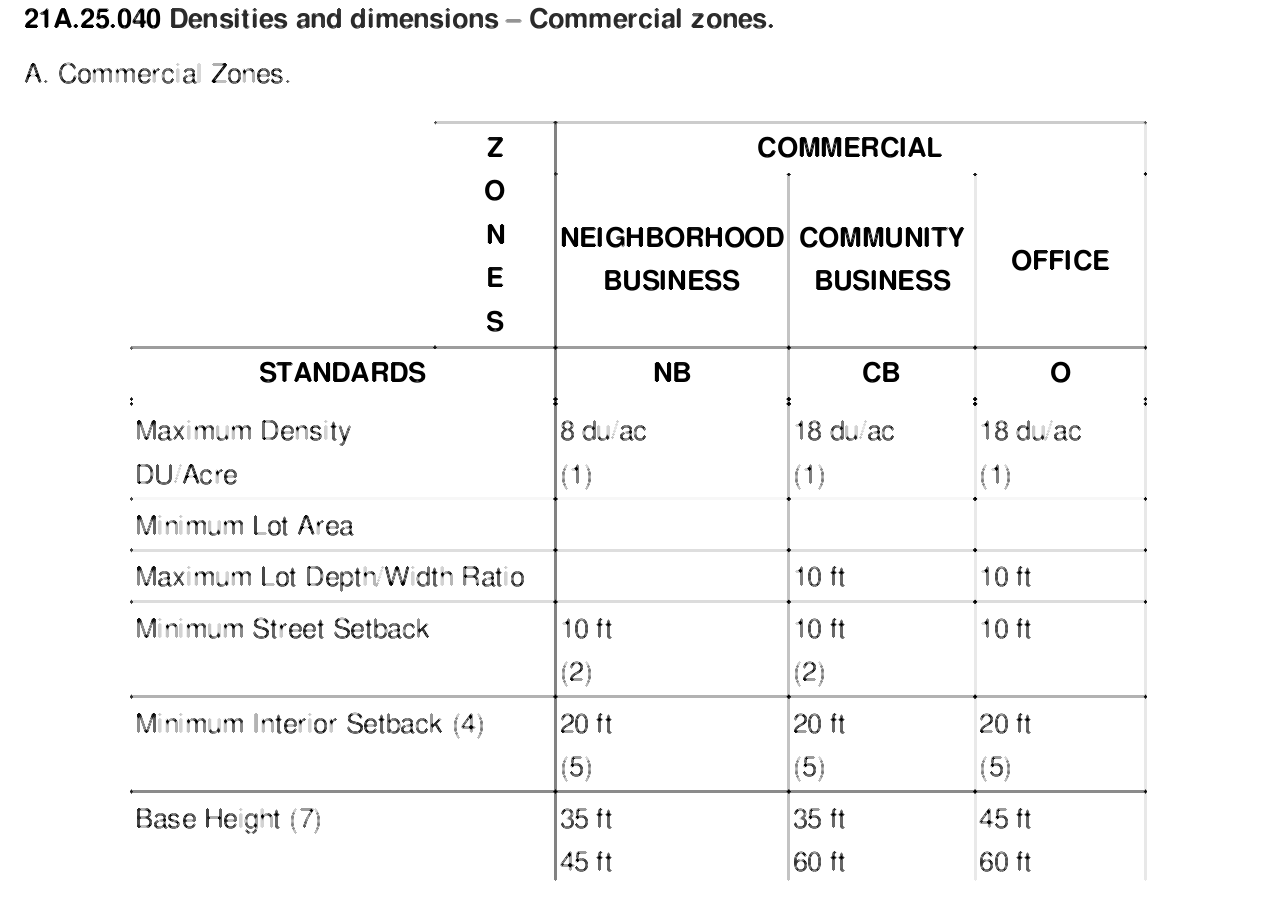

In [8]:
dilation = skm.dilation(im, skm_disk)
erosion_of_dilation  = skm.erosion(dilation, skm_disk)

view(erosion_of_dilation)

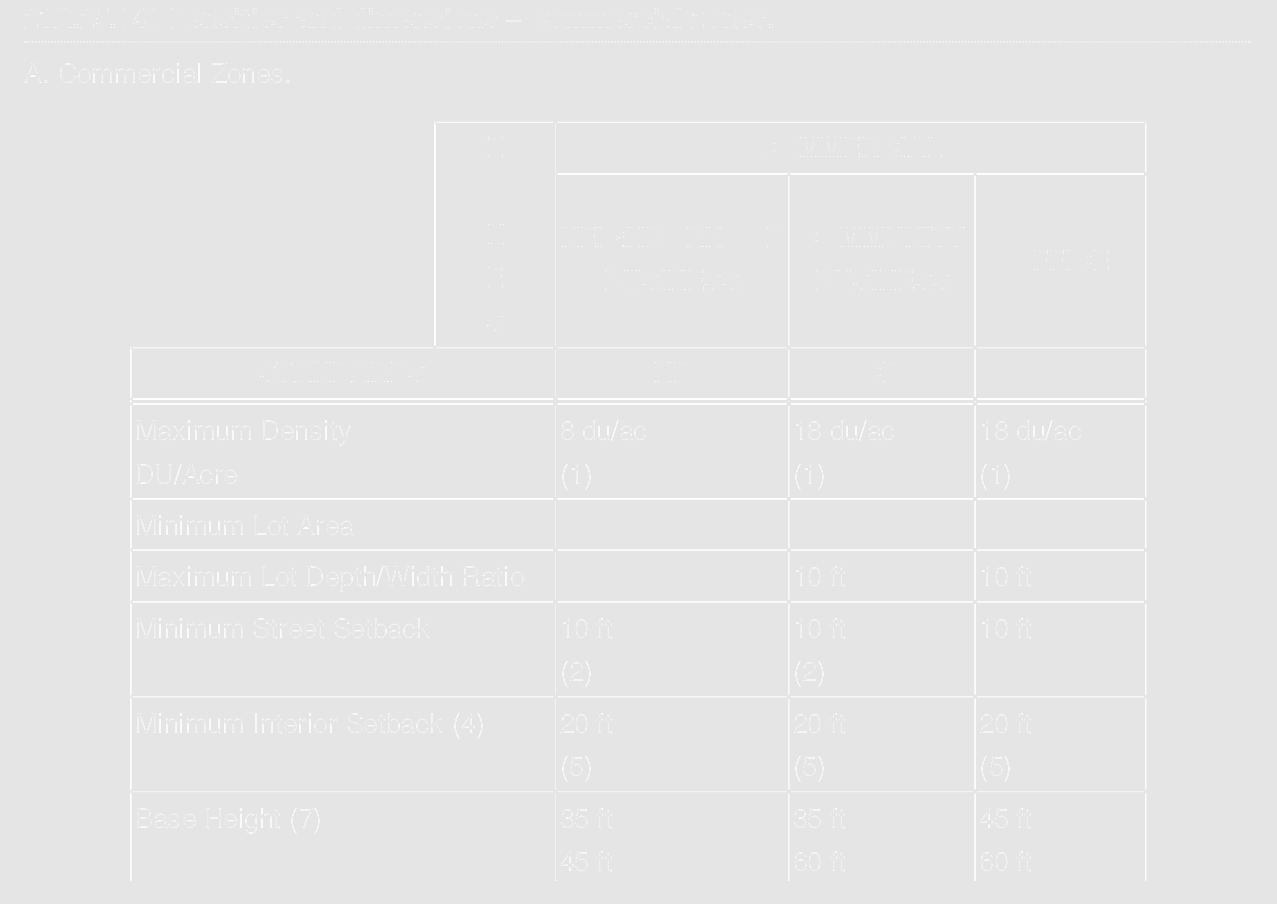

In [13]:
d1 = equalize(skm.closing(erosion_of_dilation, skm_disk) - im)
view(d1)